In [1]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [2]:
used_ts = 1:5
colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-abstractions")

"/home/antonxue/stuff/nn-sdp/notebooks/../dump/cartpole-abstractions"

In [3]:
function loadDataFrame(qcas)
    qca_str = join(string.(qcas), "-")
    ostr = "deepsdp__dual"    
    filepath = joinpath(DUMP_DIR, "cart40_$(qca_str)_$(ostr).csv")
    return CSV.File(filepath)
end

b_df = loadDataFrame([:bounded])
s_df = loadDataFrame([:sector])
f_df = loadDataFrame([:final])
bs_df = loadDataFrame([:bounded, :sector])
bf_df = loadDataFrame([:bounded, :final])
sf_df = loadDataFrame([:sector, :final])
bsf_df = loadDataFrame([:bounded, :sector, :final])
;

In [4]:
[b_df[:l2gain_squared] bs_df[:l2gain_squared]]

5×2 Matrix{Float64}:
 6.84142  6.79584
 6.19286  6.18515
 6.51447  6.50915
 7.10924  7.10734
 7.8148   7.81346

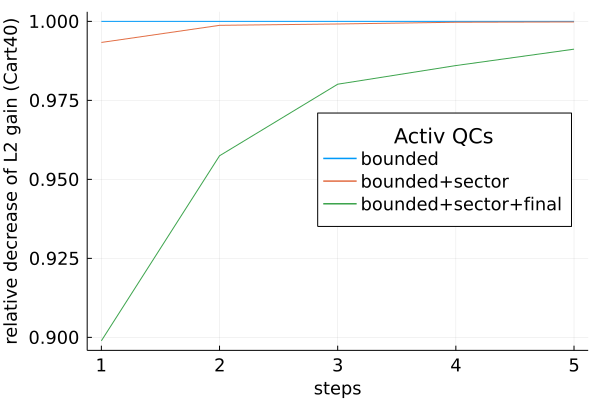

In [6]:
baseline = b_df[:l2gain_squared]

fs = 12

plt = plot()
plt = plot!(plt, b_df[:l2gain_squared] ./ baseline, label="bounded")
# plt = plot!(plt, f_df[:l2gain_squared] ./ baseline, label="final")
plt = plot!(plt, bs_df[:l2gain_squared] ./ baseline, label="bounded+sector")
# plt = plot!(plt, bf_df[:l2gain_squared] ./ baseline, label="bounded+final")
# plt = plot!(plt, sf_df[:l2gain_squared] ./ baseline, label="sector+final")
plt = plot!(plt, bsf_df[:l2gain_squared] ./ baseline, label="bounded+sector+final")

plt = plot!(plt, xlabel="steps", ylabel="relative decrease of L2 gain (Cart40)")
plt = plot!(plt, legend=:right, legendtitle="Activ QCs")

plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs, legendtitlefontsize=fs+2)

savefig(plt, joinpath(DUMP_DIR, "l2gain-qc-activs"))
    
plt